In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("student_perf_por_dummies.csv")

In [3]:
df

,Unnamed: 0,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,...,Walc_5,health_2,health_3,health_4,health_5,age,absences,G1,G2,G3
0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,18,4,0,11,11
1,1,0,0,1,0,1,0,0,0,0,...,0,0,1,0,0,17,2,9,11,11
2,2,0,0,1,1,1,0,0,0,0,...,0,0,1,0,0,15,6,12,13,12
3,3,0,0,1,0,1,1,0,0,0,...,0,0,0,0,1,15,0,14,14,14
4,4,0,0,1,0,1,0,1,0,0,...,0,0,0,0,1,16,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,644,1,0,0,0,1,0,0,1,0,...,0,0,0,0,1,19,4,10,11,10
645,645,1,0,1,1,1,0,0,0,1,...,0,0,0,0,0,18,4,15,15,16
646,646,1,0,1,0,1,0,1,0,0,...,0,0,0,0,1,18,6,11,12,9
647,647,1,1,1,1,1,0,0,1,0,...,0,1,0,0,0,17,6,10,10,10


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 74 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Unnamed: 0         649 non-null    int64
 1   school_MS          649 non-null    int64
 2   sex_M              649 non-null    int64
 3   address_U          649 non-null    int64
 4   famsize_LE3        649 non-null    int64
 5   Pstatus_T          649 non-null    int64
 6   Mjob_health        649 non-null    int64
 7   Mjob_other         649 non-null    int64
 8   Mjob_services      649 non-null    int64
 9   Mjob_teacher       649 non-null    int64
 10  Fjob_health        649 non-null    int64
 11  Fjob_other         649 non-null    int64
 12  Fjob_services      649 non-null    int64
 13  Fjob_teacher       649 non-null    int64
 14  reason_home        649 non-null    int64
 15  reason_other       649 non-null    int64
 16  reason_reputation  649 non-null    int64
 17  guardian_mother 

In [5]:
X = df.drop(["G3", "Unnamed: 0", "results_pass"], axis=1)
y = df["G3"]

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [8]:
scaler = StandardScaler()

In [9]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
from sklearn.linear_model import LinearRegression
lin = LinearRegression()
lin.fit(X_train, y_train)

LinearRegression()

In [22]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(max_iter=1000)
log.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [12]:
from sklearn.svm import LinearSVR
lin_svr = LinearSVR(max_iter=10000)
lin_svr.fit(X_train, y_train)

LinearSVR(max_iter=10000)

In [13]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train, y_train)

SVR()

In [14]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [15]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [16]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)

GradientBoostingRegressor()

In [17]:
from sklearn.ensemble import AdaBoostRegressor
ab = AdaBoostRegressor()
ab.fit(X_train, y_train)

AdaBoostRegressor()

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [19]:
def report(model):
    preds = model.predict(X_test)
    print(f"MAE: {mean_absolute_error(y_test,preds)}")
    print(f"MSE: {mean_squared_error(y_test,preds)}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test,preds))}")


In [20]:
print("Linear Model")
report(lin)

Linear Model
MAE: 0.8658313809287328
MSE: 1.247040685893874
RMSE: 1.1167097590215078


In [23]:
print("Log Model")
report(log)

Log Model
MAE: 1.4923076923076923
MSE: 4.7846153846153845
RMSE: 2.1873763701328093


In [24]:
print("Linear_svr Model")
report(lin_svr)

Linear_svr Model
MAE: 0.7414052388946972
MSE: 0.913306284293893
RMSE: 0.9556705940301256


In [25]:
print("SVR Model")
report(svr)

SVR Model
MAE: 1.1100581252692954
MSE: 2.18580276831799
RMSE: 1.4784460654071863


In [26]:
print("Decision Tree Model")
report(dt)

Decision Tree Model
MAE: 1.158974358974359
MSE: 4.666666666666667
RMSE: 2.160246899469287


In [27]:
print("Random Forest Model")
report(rf)

Random Forest Model
MAE: 0.8848205128205128
MSE: 1.5710358974358973
RMSE: 1.2534097085294567


In [28]:
print("Gradient Boosting Model")
report(gb)

Gradient Boosting Model
MAE: 0.8402641319411963
MSE: 1.336335541795078
RMSE: 1.155999801814463


In [29]:
print("Ada Boost Model")
report(ab)

Ada Boost Model
MAE: 1.061005655072064
MSE: 2.1152680388806715
RMSE: 1.4543961079708208


In [42]:
test_predictions = lin.predict(X_test)

In [43]:
test_res = y_test - test_predictions

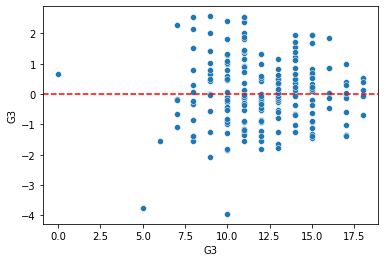

In [44]:
sns.scatterplot(x=y_test,y=test_res)
plt.axhline(y=0, color='r', linestyle='--')

In [45]:
import scipy as sp

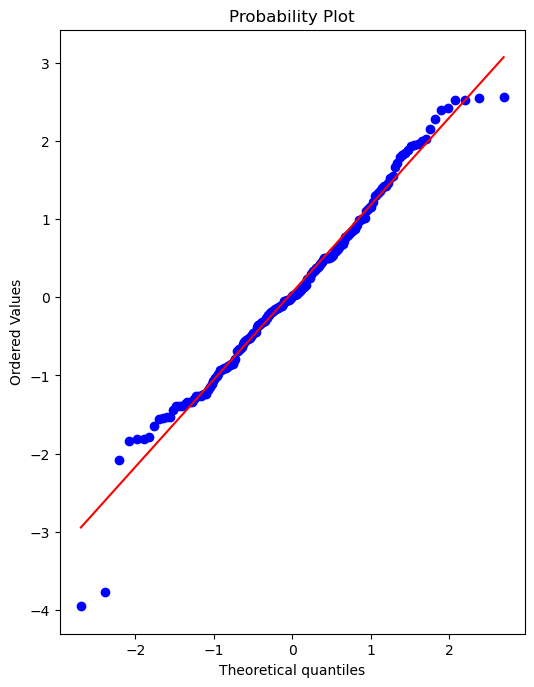

In [46]:
# Create a figure and axis to plot on
fig, ax = plt.subplots(figsize=(6,8),dpi=100)
# probplot returns the raw values if needed
# we just want to see the plot, so we assign these values to _
_ = sp.stats.probplot(test_res,plot=ax)

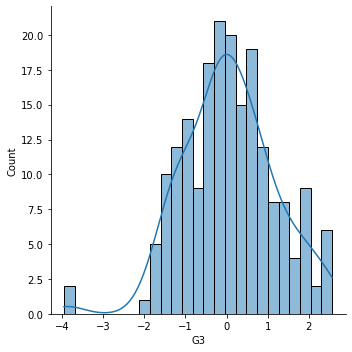

In [47]:
sns.displot(test_res,bins=25,kde=True)

In [48]:
test_predictions = lin_svr.predict(X_test)

In [49]:
test_res = y_test - test_predictions

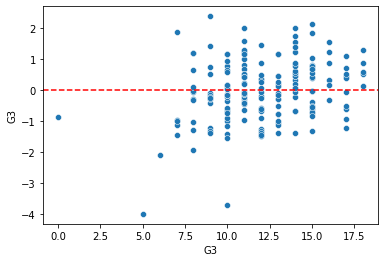

In [50]:
sns.scatterplot(x=y_test,y=test_res)
plt.axhline(y=0, color='r', linestyle='--')

In [51]:
import scipy as sp

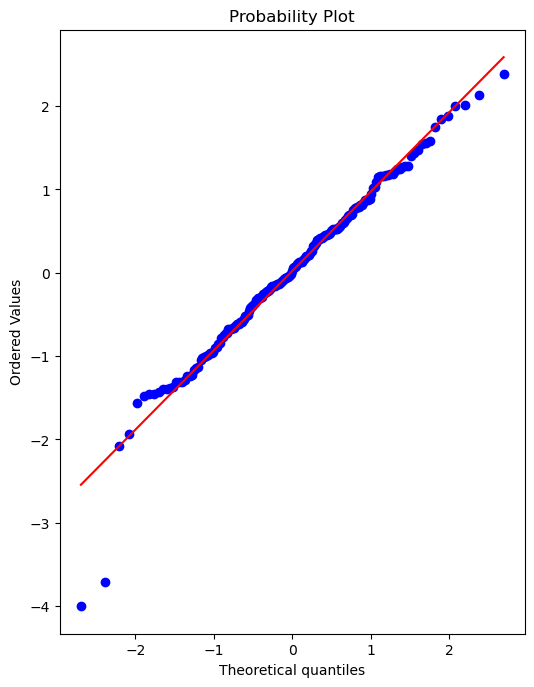

In [52]:
# Create a figure and axis to plot on
fig, ax = plt.subplots(figsize=(6,8),dpi=100)
# probplot returns the raw values if needed
# we just want to see the plot, so we assign these values to _
_ = sp.stats.probplot(test_res,plot=ax)

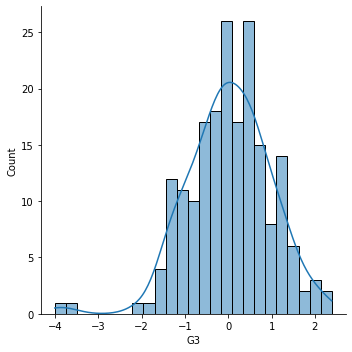

In [53]:
sns.displot(test_res,bins=25,kde=True)